In [1]:
import pandas as pd

## The Dataset

The dataset used for this project comes from Insideairbnb.com, an anti-Airbnb lobby group that scrapes Airbnb listings, reviews and calendar data for multiple cities around the world. The dataset was scraped on 30 September 2021 and contains information on all Copenhagen Airbnb listings that were live on the site on that date. 

## Cleaning and PreProcessing

### Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [3]:
raw_df = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data/Copenhagen/2021-09-30/data/listings.csv.gz')
print(f"The dataset contains {len(raw_df)} AirBnb listings.")
pd.set_option('display.max_columns', len(raw_df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
raw_df.head(3)

The dataset contains 9625 AirBnb listings.


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6983,https://www.airbnb.com/rooms/6983,20210930020050,2021-09-30,Copenhagen 'N Livin',"Lovely apartment located in the hip Nørrebro area, close to bars, cafés and restaurants.<br />The room itself is rather small, but sleeps two. Has a bed, hangers and a cupboard.<br />Large living room with couch, chair and small table, as well as a large dining table for dinner.<br />Large bathroom with good shower and washing machine.<br />Kitchen with new gas stove, pots and pans, coffee machine and other amenities. Also a small table, where you can have breakfast.<br /><br /><b>The space</b><br />Beautiful and cosy apartment conveniently located in the hip Nørrebro area, close to cafés, bakeries, shops, and bars.<br />The apartment has three bedrooms and a living room, as well as a large bathroom and a fully equipped kitchen. You will be renting the small room, which sleeps 2 people.<br /><br />Situated in the outskirts of central Copenhagen, in the charming multi-cultural ""Nørrebro""-area, close to shopping amenities and a 10-min walk from both Copenhagen Business School (CBS) and U","Nice bars and cozy cafes just minutes away, yet the street itself is quiet and you won't be bothered by loud music.",https://a0.muscache.com/pictures/42044170/f63c4d99_original.jpg,16774,https://www.airbnb.com/users/show/16774,Simon,2009-05-12,"Copenhagen, Capital Region of Denmark, Denmark","I'm currently working as an environmental consultant for a large engineering consultancy in Copenhagen.\r\nWhen I'm not at work, I spend time doing sports (playing football, running, cross fit), or doing indoor activities such as reading books and listening to music. I have recently taken an interest in cooking, and I love great food. \r\nI'm outgoing, happy and love good company.\r\nAnd I love my bike as any other person from Copenhagen..",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/16774/profile_pic/1401276934/original.jpg?aki_policy=profile_small,https://a0.muscache.com/im/users/16774/profile_pic/1401276934/original.jpg?aki_policy=profile_x_medium,Nørrebro,1.0,1.0,"['email', 'phone', 'reviews']",t,f,"Copenhagen, Hovedstaden, Denmark",Nrrebro,NaN,55.68641,12.54741,Private room in rental unit,Private room,2,NaN,1 shared bath,1.0,1.0,"[""Cooking basics"", ""Washer"", ""Heating"", ""Backyard"", ""Wifi"", ""Bed linens"", ""Hot water"", ""Hangers"", ""Hair dryer"", ""Refrigerator"", ""Oven"", ""Coffee maker"", ""Dedicated workspace"", ""Room-darkening shades"", ""Stove"", ""Paid parking off premises"", ""Luggage dropoff allowed"", ""Microwave"", ""Smoke alarm"", ""Dishwasher"", ""Cable TV"", ""Kitchen"", ""Iron"", ""TV with standard cable"", ""Dishes and silverware"", ""Ess

## Dropping initial columns
+ Drop free texts columns
+ drop columns which not useful for predicting price

In [4]:
cols_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'calendar_last_scraped']


df = raw_df.drop(cols_to_drop, axis=1)

Other columns can be dropped because they contain a majority of null entries

In [5]:
df.isna().sum()

id                                                 0
picture_url                                        0
host_since                                         3
host_response_time                              2956
host_response_rate                              2956
host_acceptance_rate                            2617
host_is_superhost                                  3
host_listings_count                                3
host_total_listings_count                          3
host_has_profile_pic                               3
host_identity_verified                             3
neighbourhood                                   4242
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                    9625
latitude                                           0
longitude                                          0
property_type                                      0
room_type                                          0
accommodates                                  

In [6]:
#df.drop(['host_response_time', 'host_response_rate',
        #'host_acceptance_rate','neighbourhood', 'neighbourhood_group_cleansed',
        #'bathrooms','calendar_updated','license'], axis=1, inplace=True)

# set id as index
#df.set_index('id', inplace=True)


In [7]:
df.drop(['host_total_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)


In [8]:
lat_long = df[['latitude', 'longitude']]

In [9]:
df.drop(['latitude', 'longitude'],axis=1, inplace=True)


In [10]:
sum((df.minimum_nights == df.minimum_minimum_nights) == False)

475

In [11]:

df.drop(['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)


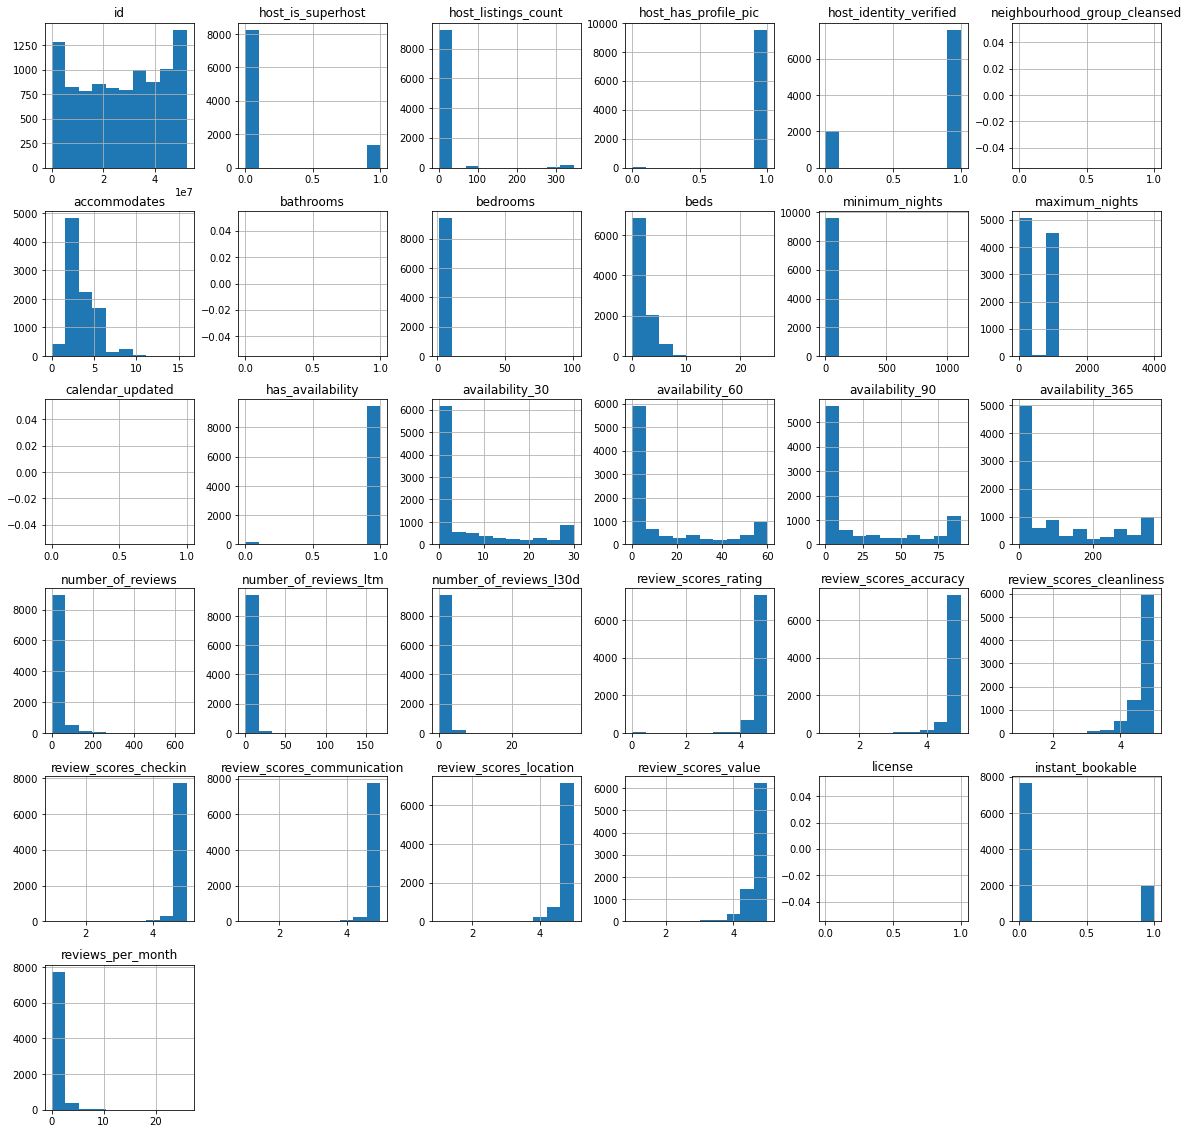

In [12]:
# Replacing columns with f/t with 0/1
df.replace({'f': 0, 't': 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
df.hist(figsize=(20,20));

In [13]:

df.drop(['has_availability', 'host_has_profile_pic'], axis=1, inplace=True)


## Description of each column:

+ experiences_offered - slightly unclear as it does not appear to directly 
+ relate to Airbnb Experiences, but this seems to be the main recommended category of travel type, e.g. business
+ host_since - date that the host first joined Airbnb
+ host_response_time - average amount of time the host takes to reply to messages
+ host_response_rate - proportion of messages that the host replies to
+ host_is_superhost - whether or not the host is a superhost, which is a mark of quality for the top-rated and most experienced hosts, and can increase your search ranking on Airbnb
+ host_listings_count - how many listings the host has in total
+ host_identity_verified - whether or not the host has been verified with id
+ neighbourhood_cleansed - the London borough the property is in
+ property_type - type of property, e.g. house or flat
+ room_type - type of listing, e.g. entire home, private room or shared room
+ accommodates - how many people the property accommodates
+ bathrooms - number of bathrooms
+ bedrooms - number of bedrooms
+ beds - number of beds
+ bed_type - type of bed, e.g. real bed or sofa-bed
+ amenities - list of amenities
+ price - nightly advertised price (the target variable)
+ security_deposit - the amount required as a security deposit
+ cleaning_fee - the amount of the cleaning fee (a fixed amount paid per booking)
+ guests_included - the number of guests included in the booking fee
+ extra_people - the price per additional guest above the guests_included price
+ minimum_nights - the minimum length of stay
+ maximum_nights - the maximum length of stay
+ calendar_updated - when the host last updated the calendar
+ availability_30 - how many nights are available to be booked in the next 30 days
+ availability_60 - how many nights are available to be booked in the next 60 days
+ availability_90 - how many nights are available to be booked in the next 90 days
+ availability_365 - how many nights are available to be booked in the next 365 days
+ number_of_reviews - the number of reviews left for the property
+ number_of_reviews_ltm - the number of reviews left for the property in the last twelve months
+ first_review - the date of the first review
+ last_review - the date of the most recent review
+ review_scores_rating - guests can score properties overall from 1 to 5 stars
+ review_scores_accuracy - guests can score the accuracy of a property's description from 1 to 5 stars
+ review_scores_cleanliness - guests can score a property's cleanliness from 1 to 5 stars
+ review_scores_checkin - guests can score their check-in from 1 to 5 stars
+ review_scores_communication - guests can score a host's communication from 1 to 5 stars
+ review_scores_location - guests can score a property's location from 1 to 5 stars
+ review_scores_value - guests can score a booking's value for money from 1 to 5 stars
+ instant_bookable - whether or not the property can be instant booked (i.e. booked straight away, without having to message the host first and wait to be accepted)
+ cancellation_policy - the type of cancellation policy, e.g. strict or moderate
+ reviews_per_month - calculated field of the average number of reviews left by guest each month

In [14]:
df.columns

Index(['id', 'picture_url', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'reviews_per_month'],
      dtype='object')

## Cleaning individual columns

### host_since
This is a datetime column, and will be converted into a measure of the 
number of days that a host has been on the platform

In [15]:
# Convert to datetime
df.host_since = pd.to_datetime(df.host_since)

# calculate the # of days
# data was scraped 9/30/2021
df['host_days_active'] = (datetime(2021, 9, 30) - df.host_since).astype('timedelta64[D]')

# print the mean and median
print('Mean days as host: ', round(df['host_days_active'].mean(),0))
print('Median days as host: ', round(df['host_days_active'].median()))

# replacing null values with the median
df.host_days_active.fillna(df.host_days_active.median(), inplace=True)

Mean days as host:  2203.0
Median days as host:  2288


### host_response_time

Because host_response_time is unknown for so many listings, it will be retained as its own category, 'unknown'

In [16]:
print("Null values:", df.host_response_time.isna().sum())
print(f"Percent: {round((df.host_response_time.isna().sum()/len(df))*100,1)}%")

# number of rows without a value, and alsomm no review
len(df[df.loc[:,['host_response_time','first_review']].isnull().sum(axis=1) == 2])

Null values: 2956
Percent: 30.7%


532

In [17]:
df.host_response_time.fillna("unknown", inplace=True)
df.host_response_time.value_counts(normalize=True)

unknown               0.307117
within an hour        0.302130
within a day          0.184000
within a few hours    0.155532
a few days or more    0.051221
Name: host_response_time, dtype: float64

### host_response_rate
+ about 1/3 of values are nulll
+ Because about 70% of hosts respond 100% of the time, this will be kept as its own category, and other values will be grouped into bins

In [18]:
print("Null values:", df.host_response_rate.isna().sum())
print(f"Percent: {round((df.host_response_rate.isna().sum()/len(df))*100,1)}%")

Null values: 2956
Percent: 30.7%


In [19]:
# Remove the % sign from the host_response_rate string
# convert to an integer
df.host_response_rate = df.host_response_rate.str[:-1].astype('float64')

print("Mean host response rate:", round(df['host_response_rate'].mean(),0))
print("Median host response rate:", df['host_response_rate'].median())
print(f"Proportion of 100% host response rates: {round(((df.host_response_rate == 100.0).sum()/df.host_response_rate.count())*100,1)}%")


Mean host response rate: 89.0
Median host response rate: 100.0
Proportion of 100% host response rates: 71.3%


In [20]:

# Bin into four categories
df.host_response_rate = pd.cut(df.host_response_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# Converting to string
df.host_response_rate = df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
df.host_response_rate.value_counts()

100%       4756
unknown    2956
50-89%      941
0-49%       634
90-99%      338
Name: host_response_rate, dtype: int64

### host_is_superhost

In [22]:
len(df[df.loc[:,['host_since', 'host_is_superhost', 'host_listings_count', 'host_identity_verified'] ].isnull().sum(axis=1) == 5])



0

### property_type
Some cleaning of property types is required as there are a large number of categories with only a few listings. The categories 'apartment', 'house' and 'other' will be used, as most properties can be classified as either apartments or houses.

In [23]:
df.property_type.value_counts()



Entire rental unit                     5803
Entire condominium (condo)             1200
Private room in rental unit             972
Entire residential home                 465
Entire serviced apartment               274
Entire townhouse                        206
Private room in condominium (condo)     153
Private room in residential home        105
Entire loft                             101
Entire villa                             71
Private room in townhouse                46
Private room in villa                    29
Room in hotel                            18
Room in hostel                           17
Room in aparthotel                       13
Private room in bed and breakfast        13
Private room in guest suite              11
Room in boutique hotel                   10
Houseboat                                10
Entire guesthouse                        10
Shared room in rental unit               10
Private room in guesthouse                9
Tiny house                      

In [28]:
# use a dictioanry to replace categories into home or apartment
df.property_type.replace({
    'Entire rental unit': 'Apartment',
    'Entire condominium (condo)': 'Apartment',
    'Private room in rental unit': 'Apartment (room)',
    'Entire residential home': 'Home',
    'Entire serviced apartment': 'Apartment',
    'Entire townhouse': 'Home',
    'Private room in condominium (condo)': 'Apartment (room)',
    'Private room in residential home': 'Home (room)',
    'Entire loft': 'Home',
    'Entire villa': 'Home'
    'Private room in townhouse' 'Home (room)',
    'Private room in villa': 'Home (room)'        
}, inplace = True)

In [30]:
# replace other categories with other
df.loc[~df.property_type.isin(['Home', 'Apartment', 'Home (room)', 'Apartment (room)']), 'property_type'] = 'Other'
df.head()

,id,picture_url,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month,host_days_active
0,6983,https://a0.muscache.com/pictures/42044170/f63c4d99_original.jpg,2009-05-12,unknown,unknown,NaN,0.0,1.0,0.0,"Copenhagen, Hovedstaden, Denmark",Nrrebro,NaN,Apartment (room),Private room,2,NaN,1 shared bath,1.0,1.0,"[""Cooking basics"", ""Washer"", ""Heating"", ""Backyard"", ""Wifi"", ""Bed linens"", ""Hot water"", ""Hangers"", ""Hair dryer"", ""Refrigerator"", ""Oven"", ""Coffee maker"", ""Dedicated workspace"", ""Room-darkening shades"", ""Stove"", ""Paid parking off premises"", ""Luggage dropoff allowed"", ""Microwave"", ""Smoke alarm"", ""Dishwasher"", ""Cable TV"", ""Kitchen"", ""Iron"", ""TV with standard cable"", ""Dishes and silverware"", ""Essentials"", ""Paid parking on premises""]",$370.00,2,15,NaN,0,0,0,0,168,0,0,2013-01-02,2018-11-23,4.78,4.78,4.78,4.87,4.90,4.72,4.71,NaN,0,1.58,4524.0
1,26057,https://a0.muscache.com/pictures/miso/Hosting-26057/original/e9c69708-06a4-4e8e-9adb-61ebbcc3457a.jpeg,2010-04-17,unknown,unknown,NaN,0.0,1.0,1.0,"Copenhagen, Hovedstaden, Denmark",Indre By,NaN,Home,Entire home/apt,6,NaN,1.5 baths,4.0,4.0,"[""Cooking basics"", ""Crib"", ""Washer"", ""Shampoo"", ""Heating"", ""Backyard"", ""Wifi"", ""Outdoor furniture"", ""Bed linens"", ""Patio or balcony"", ""Hot water"", ""Hangers"", ""Hair dryer"", ""Refrigerator"", ""Oven"", ""Coffee maker"", ""Dedicated workspace"", ""Stove"", ""Dryer"", ""TV"", ""Smoke alarm"", ""Dishwasher"", ""Bathtub"", ""Fire extinguisher"", ""Kitchen"", ""Iron"", ""High chair"", ""Dishes and silverware"", ""Essentials"", ""Long term stays allowed"", ""Indoor fireplace""]","$2,400.00",4,1125,NaN,17,45,69,340,51,1,0,2016-02-06,2019-12-14,4.90,4.91,4.96,4.91,4.83,4.96,4.80,NaN,0,0.74,4184.0
2,29118,https://a0.muscache.com/pictures/236213/33956c43_original.jpg,2010-05-15,within a few hours,100%,50%,0.0,1.0,1.0,NaN,Vesterbro-Kongens Enghave,NaN,Apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Children\u2019s dinnerware"", ""Cooking basics"", ""Crib"", ""Washer"", ""Children\u2019s books and toys"", ""Heating"", ""Wifi"", ""Patio or balcony"", ""Hot water"", ""Hangers"", ""Hair dryer"", ""Refrigerator"", ""Oven"", ""Dedicated workspace"", ""Room-darkening shades"", ""Stove"", ""Paid parking off premises"", ""Changing table"", ""Microwave"", ""Dishwasher"", ""Kitchen"", ""Host greets you"", ""Iron"", ""High chair"", ""Baby bath"", ""Dishes and silverware"", ""Pack \u2019n Play/travel crib"", ""Essentials""]",$725.00,7,14,NaN,0,0,15,101,22,0,0,2016-08-24,2019-07-22,4.91,4.85,4.77,5.00,5.00,4.85,4.77,NaN,0,0.35,4156.0
3,31094,https://a0.muscache.com/pictures/19408864/7c4cd0ec_original.jpg,2010-05-22,unknown,unknown,0%,0.0,1.0,1.0,"Copenhagen, Capital Region of Denmark, Denmark",Vesterbro-Kongens Enghave,NaN,Apartment,Entire home/apt,3,NaN,1 bath,1.0,3.0,"[""Kitchen"", ""Cable TV"", ""Wifi"", ""TV with standard cable"", ""Heating""]",$750.00,2,10,NaN,0,0,0,0,17,0,0,2016-06-19,2012-06-10,4.87,4.80,4.87,4.85,4.80,4.85,4.46,NaN,0,0.26,4149.0
4,32379,https://a0.muscache.com/pictures/4088872/c50aeb23_original.jpg,2010-06-07,within a few hours,100%,91%,0.0,3.0,1.0,"Copenhagen, Hovedstaden, Denmark",Vesterbro-Kongens Enghave,NaN,Apartment,Entire home/apt,5,NaN,2 baths,3.0,4.0,"[""Drying rack for clothing"", ""Cooking basics"", ""Toaster"", ""Washer"", ""Shampoo"

### bathrooms, bedrooms and beds
Missing values will be replaced with the median

In [32]:
for col in ['bathrooms', 'bedrooms', 'beds']:
    df[col].fillna(df[col].median(), inplace=True)

### amenities

In [34]:
# example of amenities listed
df.amenities[:1].values

array(['["Cooking basics", "Washer", "Heating", "Backyard", "Wifi", "Bed linens", "Hot water", "Hangers", "Hair dryer", "Refrigerator", "Oven", "Coffee maker", "Dedicated workspace", "Room-darkening shades", "Stove", "Paid parking off premises", "Luggage dropoff allowed", "Microwave", "Smoke alarm", "Dishwasher", "Cable TV", "Kitchen", "Iron", "TV with standard cable", "Dishes and silverware", "Essentials", "Paid parking on premises"]'],
      dtype=object)

In [ ]:
# create a set of all possible amenities